In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

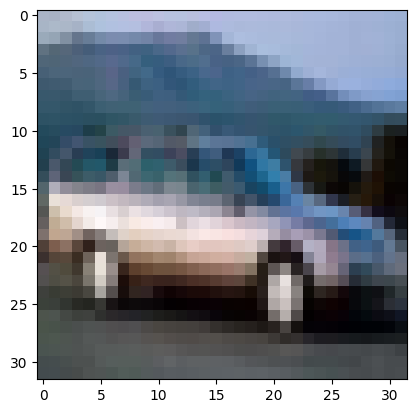

In [7]:
plt.imshow(X_train[4])

In [8]:
X_test_scaled = X_test/255
X_train_scaled = X_train/255

In [9]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10).astype('float32')

In [10]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10).astype('float32')

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs= 2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 88ms/step - accuracy: 0.3062 - loss: 1.9280
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 87ms/step - accuracy: 0.4227 - loss: 1.6364


In [12]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


array([[0.3981156 , 0.55833596, 0.68506104, ..., 0.12300708, 0.62010777,
        0.13118534],
       [0.8367246 , 0.8514589 , 0.26467404, ..., 0.17428021, 0.9596442 ,
        0.9690114 ],
       [0.9122412 , 0.7786118 , 0.3136172 , ..., 0.19832037, 0.97095186,
        0.8828109 ],
       ...,
       [0.18810284, 0.10432   , 0.81508195, ..., 0.64822036, 0.34644833,
        0.22448048],
       [0.32292002, 0.28134546, 0.74891454, ..., 0.49622035, 0.29177865,
        0.30189565],
       [0.5332413 , 0.16869278, 0.7200535 , ..., 0.89437985, 0.33282182,
        0.30654472]], dtype=float32)

In [13]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4410 - loss: 1.5621


[1.5630556344985962, 0.4438999891281128]

In [14]:
def get_model():
   model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])
   model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

   return model

In [16]:
%%timeit -n1 -r1
# Corrected the device string from '/CPU:O' to '/CPU:0'
with tf.device('/CPU:0'):
     cpu_model = get_model()
     cpu_model.fit(X_train_scaled,y_train_categorical,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.3036 - loss: 1.9386
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.4215 - loss: 1.6442
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.4549 - loss: 1.5527
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.4748 - loss: 1.4863
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 91ms/step - accuracy: 0.4944 - loss: 1.4375
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 92ms/step - accuracy: 0.5140 - loss: 1.3888
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.5290 - loss: 1.3527
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 94ms/step - accuracy: 0.5398 - loss: 1.3134
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.5531 - loss: 1.2776
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 93ms/step - accuracy: 0.5631 - loss: 1.2524
29min 51s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
'''%%timeit -n1 -r1
with tf.device('/GPU:O'):
     gpu_model = get_model()
     gpu_model.fit(X_train_scaled,y_train_categorical,epochs=10)